In [1]:
import numpy as np
import pylab as p
import matplotlib.pyplot  as  plt
import matplotlib.cm as cm

import math
import itertools 

np.set_printoptions(linewidth = 130, precision = 13)
%matplotlib inline

from scipy.optimize import fsolve
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from matplotlib import colors
from matplotlib import pyplot

In [2]:
def resistance(beta):
    R0 = beta/(gamm + r)
    mu = 1/(k*(R0 - 1))
    theta2 = (R0/2)*(mu*(2*mu + 1)/(mu + 1)**2)
    theta4 = beta/(2*k)*1/(mu + 1)**2
    
    #lambda^2_1 + lambda^1_2
    summ = theta4*(alp[0,1] + alp[1,0] - alp[0,0] - alp[1,1])
    lambd12 = -del_b - theta2*del_gamm + theta4*(mu*(alp[0][1] - alp[1][0]) + alp[0][1] - alp[0][0])
    lambd21 = summ - lambd12
    
    return lambd12/summ

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


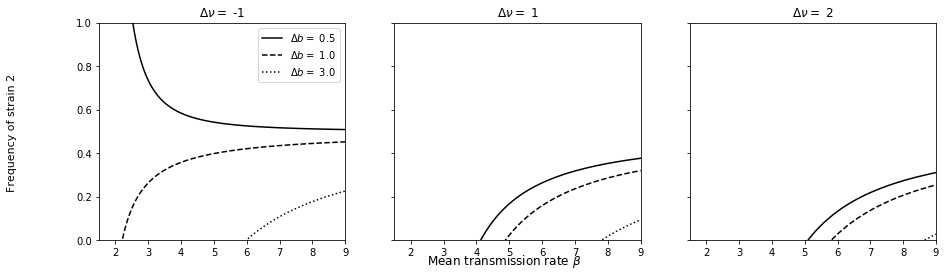

In [3]:
r = 0.3
alp = np.array([[0, np.sqrt(2)], [np.sqrt(2), 0]])
k = 1
gamm = 1.2

fig1, ax = plt.subplots(1, 3, sharey='row', figsize=(15,4))

delnu_arr = np.array([-1, 1, 2])
delb_arr = np.array([0.5, 1, 3])

ls = ['-', '--', ':']
beta_arr = np.linspace(1.5, 9, 1000)

for i in range (0, 3):
    for j in range (0, 3):
        del_gamm = delnu_arr[i]
        del_b = delb_arr[j]
        
        res = []
        
        for beta in beta_arr:
            z2 = resistance(beta)
            res.append(z2)
        
        ax[i].plot(beta_arr, res, 'k', linestyle = ls[j], label='$\Delta b =$ {}'.format(del_b))
    ax[i].set_xlim([1.5, 9])
    ax[i].set_ylim([0, 1])
    
fig1.text(0.5, 0.04, 'Mean transmission rate $\\beta$', fontsize = 12, ha='center')
fig1.text(0.04, 0.5, 'Frequency of strain 2', fontsize = 11, va='center', rotation='vertical')

ax[0].legend(loc="best")
cols = ['$\Delta \\nu =$ {}'.format(del_gamm) for del_gamm in delnu_arr]

for ax, col in zip(ax, cols):
    ax.set_title(col)
    
fig1.savefig('5.2.jpg')